## Online Retail Data Set  
https://archive.ics.uci.edu/ml/datasets/online+retail  

Data Set Information:  
  
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.  


Attribute Information:  
  
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
Description: Product (item) name. Nominal.  
Quantity: The quantities of each product (item) per transaction. Numeric.  
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.  
UnitPrice: Unit price. Numeric, Product price per unit in sterling.  
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
Country: Country name. Nominal, the name of the country where each customer resides.   

## 1.RFM
## 2.Customer Segmentation(K-means)
## 3.Cohort Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn

In [2]:
df = pd.read_csv("retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,20.34


In [7]:
df["CustomerID"]=df["CustomerID"].astype('str')
df['date']=pd.to_datetime(df['InvoiceDate'], format = '%Y-%m-%d')
df['date']=df['date'].astype(np.str).str.slice(0,8).str.replace('-','')
df['date'] = pd.to_numeric(df['date'], errors='coerce')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 08:26,2.55,17850.0,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 08:26,2.75,17850.0,United Kingdom,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 08:26,3.39,17850.0,United Kingdom,20.34,201012


最近購買日期(Recency)

In [9]:
def f(row):
    if row['date'] > 201110:
        val = 5
    elif row['date'] <= 201110 and row['date'] > 201108:
        val = 4
    elif row['date'] <= 201108 and row['date'] > 201106:
        val = 3
    elif row['date'] <= 201106 and row['date'] > 201104:
        val = 2
    else:
        val = 1
    return val
df_recency_1=df[['CustomerID','date']].drop_duplicates()
df_recency_1['Recency_Flag'] = df_recency_1.apply(f, axis=1)
df_recency = df_recency_1.groupby('CustomerID',as_index=False)['Recency_Flag'].max()

In [10]:
df_recency.head()

,CustomerID,Recency_Flag
0,12346.0,1
1,12347.0,5
2,12348.0,4
3,12349.0,5
4,12350.0,1


購買頻率(Frequency)

In [11]:
Cust_freq=df[['InvoiceNo','CustomerID']].drop_duplicates()
#Calculating the count of unique purchase for each customer
Cust_freq_count=Cust_freq.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').\
reset_index().sort_values('InvoiceNo', ascending=False, axis=0)

# Dividing in 5 equal parts
unique_invoice=Cust_freq_count[['InvoiceNo']].drop_duplicates()
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()
unique_invoice

,Freqency_Band
4372,"(63.0, 3710.0]"
1078,"(41.0, 63.0]"
576,"(27.0, 41.0]"
1813,"(14.0, 27.0]"
4213,"(0.999, 14.0]"


In [12]:
def f2(row):
    if row['InvoiceNo'] < 14:
        val = 1
    elif row['InvoiceNo'] <= 27:
        val = 2
    elif row['InvoiceNo'] <= 41:
        val = 3
    elif row['InvoiceNo'] <= 63:
        val = 4
    else:
        val = 5
    return val
    
Cust_freq_count['Freq_Flag'] = Cust_freq_count.apply(f2, axis=1)

In [13]:
Cust_freq_count['Freq_Flag'].value_counts()

1    4064
2     227
3      47
4      21
5      14
Name: Freq_Flag, dtype: int64

購買金額(Monetary)

In [14]:
#Calculating the Sum of total monetary purchase for each customer
Cust_monetary = df.groupby(['CustomerID'])['TotalPrice'].aggregate('sum').\
reset_index().sort_values('TotalPrice', ascending=False)
# splitting Total price in 5 parts
unique_price=Cust_monetary[['TotalPrice']].drop_duplicates()
unique_price=unique_price[unique_price['TotalPrice'] > 0]
unique_price['monetary_Band'] = pd.qcut(unique_price['TotalPrice'], 5)
unique_price=unique_price[['monetary_Band']].drop_duplicates()
unique_price

,monetary_Band
4372,"(2043.888, 1447682.12]"
830,"(938.58, 2043.888]"
3511,"(488.098, 938.58]"
1218,"(250.008, 488.098]"
2338,"(-0.0009999999999876, 250.008]"


In [15]:
def f3(row):
    if row['TotalPrice'] <= 250:
        val = 1
    elif row['TotalPrice'] > 250 and row['TotalPrice'] <= 488:
        val = 2
    elif row['TotalPrice'] > 488 and row['TotalPrice'] <= 938:
        val = 3
    elif row['TotalPrice'] > 938 and row['TotalPrice'] <= 2043:
        val = 4
    else:
        val = 5
    return val
Cust_monetary['Monetary_Flag'] = Cust_monetary.apply(f3, axis=1)

## 合併 RFM 欄位

In [16]:
Cust_All=pd.merge(df_recency,Cust_freq_count[['CustomerID','Freq_Flag']], on=['CustomerID'],how='left')
Cust_All=pd.merge(Cust_All,Cust_monetary[['CustomerID','Monetary_Flag']], on=['CustomerID'],how='left')
Cust_All.head(10)

,CustomerID,Recency_Flag,Freq_Flag,Monetary_Flag
0,12346.0,1,1,1
1,12347.0,5,1,5
2,12348.0,4,1,4
3,12349.0,5,1,4
4,12350.0,1,1,2
5,12352.0,5,1,4
6,12353.0,2,1,1
7,12354.0,1,1,4
8,12355.0,2,1,2
9,12356.0,5,1,5


In [17]:
Cust_All2=Cust_All.drop(Cust_All.columns[0], axis=1)

In [18]:
Cust_All2.head()

,Recency_Flag,Freq_Flag,Monetary_Flag
0,1,1,1
1,5,1,5
2,4,1,4
3,5,1,4
4,1,1,2


## K means 分群

In [19]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(Cust_All2)
    wcss.append(kmeans.inertia_)

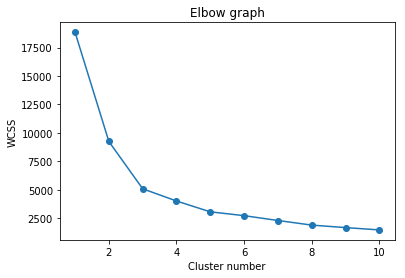

In [20]:
import matplotlib.pyplot as plt 

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

## 分為10群

In [21]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
Cust_All['clusters'] = kmeans.fit_predict(Cust_All2)
Cust_All.tail(10)

,CustomerID,Recency_Flag,Freq_Flag,Monetary_Flag,clusters
4363,18274.0,5,1,1,0
4364,18276.0,5,1,2,5
4365,18277.0,4,1,1,0
4366,18278.0,4,1,1,0
4367,18280.0,1,1,1,2
4368,18281.0,2,1,1,2
4369,18282.0,5,1,1,0
4370,18283.0,5,2,5,6
4371,18287.0,4,1,4,3
4372,nan,5,5,5,7


## 第8群

In [22]:
round(pd.DataFrame(kmeans.cluster_centers_),2)

,0,1,2
0,4.21,1.00,1.00
1,5.00,1.01,4.00
2,1.29,1.00,1.42
3,3.77,1.03,4.36
4,1.53,1.01,3.47
5,5.00,1.00,2.58
6,5.00,1.35,5.00
7,5.00,3.60,4.99
8,3.74,1.00,3.00
9,3.70,1.00,2.00


In [23]:
Cust_All[Cust_All.clusters== 8].head()

,CustomerID,Recency_Flag,Freq_Flag,Monetary_Flag,clusters
16,12363.0,3,1,3,8
28,12379.0,4,1,3,8
35,12390.0,4,1,3,8
53,12413.0,4,1,3,8
57,12418.0,3,1,3,8


In [24]:
df2=Cust_All.merge(Cust_freq_count[['CustomerID', 'InvoiceNo']], on='CustomerID')
df2=df2.merge(Cust_monetary[['CustomerID', 'TotalPrice']], on='CustomerID')
df2=df2.merge(df_recency_1[['CustomerID', 'date']], on='CustomerID')
df2.rename(columns={'InvoiceNo':'Frequency', 'TotalPrice':'Monetary', 'date':'Recency'}, inplace=True)
df2['Monetary']=df2['Monetary'].round()
df2.head()

,CustomerID,Recency_Flag,Freq_Flag,Monetary_Flag,clusters,Frequency,Monetary,Recency
0,12346.0,1,1,1,2,2,0.0,201101
1,12347.0,5,1,5,6,7,4310.0,201012
2,12347.0,5,1,5,6,7,4310.0,201101
3,12347.0,5,1,5,6,7,4310.0,201104
4,12347.0,5,1,5,6,7,4310.0,201106


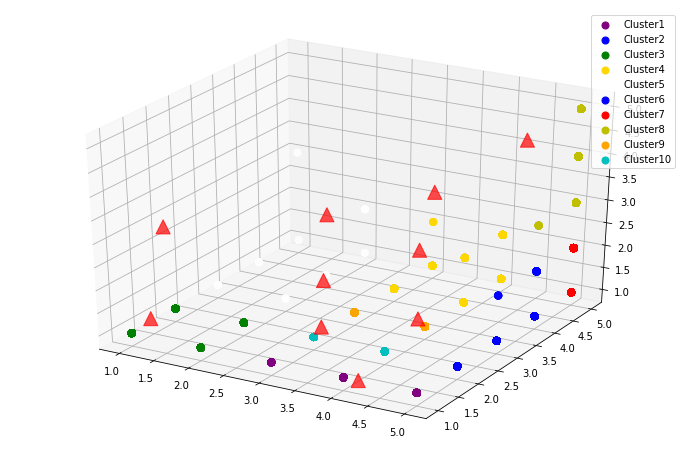

In [25]:
from mpl_toolkits.mplot3d import Axes3D 
colors=['purple', 'blue', 'green', 'gold','w','b','r','y','orange','c']
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')
for i in range(kmeans.n_clusters):
    df_cluster=df2[df2['clusters']==i]
    ax.scatter(df_cluster['Recency_Flag'], df_cluster['Monetary_Flag'],df_cluster['Freq_Flag'],s=50,label='Cluster'+str(i+1), c=colors[i])
plt.legend()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=200,marker='^', c='red', alpha=0.7, label='Centroids')

## 同類群組分析(Cohort Analysis)

In [26]:
import pandas as pd
import numpy as np
import os
import datetime as dt

df2 = pd.read_csv("retail.csv",converters={'CustomerID':str})
df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'], format = '%Y-%m-%d')
df2['InvoiceDate']=df2.InvoiceDate.astype(np.str).str.slice(0,10) 
df2.InvoiceDate=pd.to_datetime(df2.InvoiceDate)

In [27]:
def monthly(x):
    return dt.datetime(x.year, x.month, 1)
df2['BillMonth'] = df2['InvoiceDate'].apply(monthly)

In [28]:
g = df2.groupby('CustomerID')['BillMonth']
df2['CohortMonth'] = g.transform('min')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,BillMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
BillMonth      541909 non-null datetime64[ns]
CohortMonth    541909 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 41.3+ MB


In [30]:
def get_int(df2, column):
    year = df2[column].dt.year
    month = df2[column].dt.month
    return year, month

In [31]:
billYear, billMonth = get_int(df2, 'BillMonth')
cohortYear, cohortMonth = get_int(df2, 'CohortMonth')
diffYear = billYear - cohortYear
diffMonth = billMonth - cohortMonth
df2['Month_Index'] = diffYear * 12 + diffMonth + 1

In [32]:
g = df2.groupby(['CohortMonth', 'Month_Index'])
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index = 'CohortMonth', columns = 'Month_Index', values = 'CustomerID')
cohortSizes = cohortCounts.iloc[:, 0]
retention = cohortCounts.divide(cohortSizes, axis = 0) * 100
retention.round(2)

Month_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.25,33.51,38.78,36.04,39.73,38.04,35.51,35.51,39.52,37.41,50.05,27.5
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


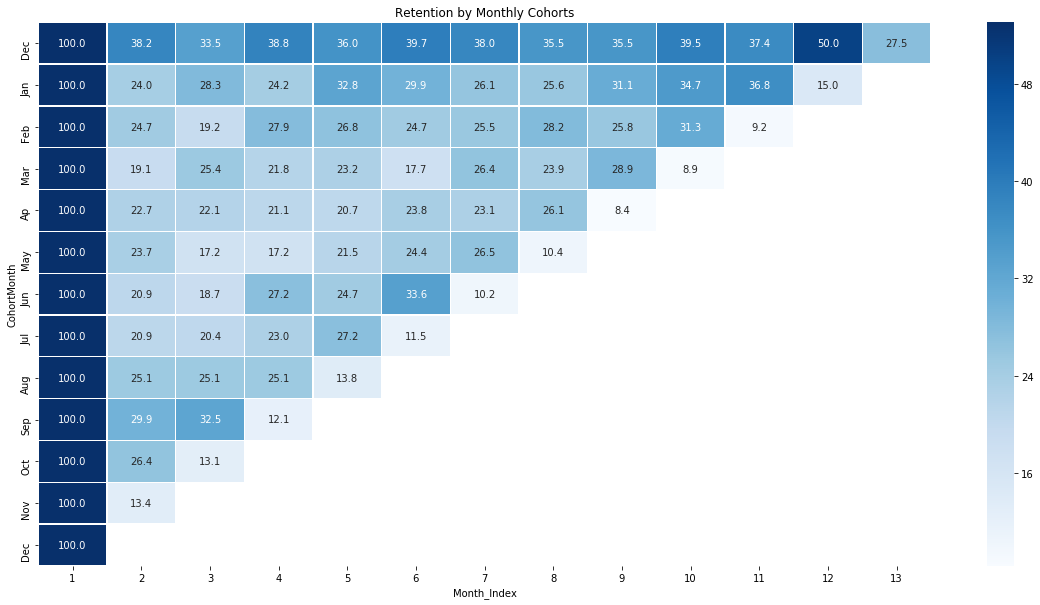

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

month_list = ["Dec", "Jan", "Feb", "Mar", "Ap", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize = (20,10))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention.round(2), annot = True, cmap = "Blues", vmax = list(retention.max().sort_values(ascending = False))[1]+3, fmt = '.1f', linewidth = 0.3, yticklabels=month_list)
plt.show()